# Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Binary Classification

## Load real-world dataset (Pima Indians Diabetes Dataset)

In [ ]:
#Load real-world dataset (Pima Indians Diabetes Dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Define column names
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Split features and target

In [ ]:
# Split features and target
X = df.drop("Outcome", axis=1)  # All columns except the label
y = df["Outcome"]               # Label column (0 or 1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show shape of the splits
print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Training features shape: (614, 8)
Test features shape: (154, 8)


## Build a simple binary classification model

In [ ]:
# Build a simple binary classification model
model = Sequential()

# First hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Output layer with 1 neuron and Sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',                  # Adam optimizer is good default
    loss='binary_crossentropy',        # Binary crossentropy for binary classification
    metrics=['accuracy']               # Accuracy to monitor performance
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,                         # Number of passes over the training data
    batch_size=32,                     # How many samples per gradient update
    validation_split=0.2,              # Use part of training data for validation
    verbose=1                          # Show progress during training
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4643 - loss: 0.7534 - val_accuracy: 0.5610 - val_loss: 0.6941
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4275 - loss: 0.7442 - val_accuracy: 0.6179 - val_loss: 0.6540
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5537 - loss: 0.6699 - val_accuracy: 0.6504 - val_loss: 0.6234
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5617 - loss: 0.6600 - val_accuracy: 0.6748 - val_loss: 0.5957
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6023 - loss: 0.6402 - val_accuracy: 0.7480 - val_loss: 0.5739
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6882 - loss: 0.6051 - val_accuracy: 0.7967 - val_loss: 0.5560
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7136 - loss: 0.5854 - val_accuracy: 0.8049 - val_loss: 0.5400
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7351 - loss: 0.5713 - val_accuracy: 0.

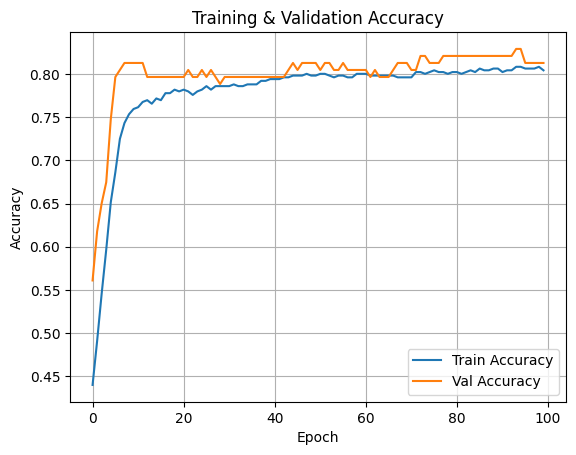

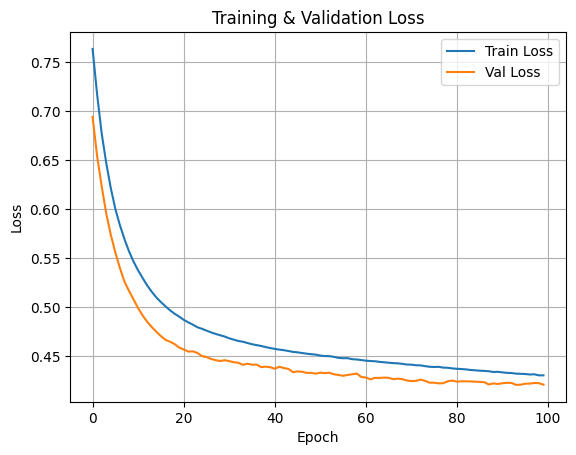

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 0.5022 

 Test Accuracy: 0.7273
 Test Loss: 0.4909
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


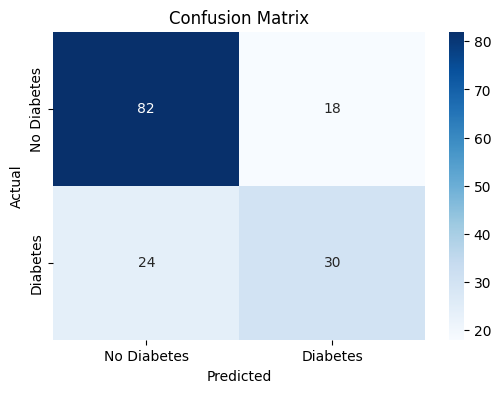


📋 Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.77      0.82      0.80       100
    Diabetes       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

# Evaluate model on test set (Accuracy and Loss)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\n Test Accuracy: {test_acc:.4f}")
print(f" Test Loss: {test_loss:.4f}")

# Predict class probabilities
y_probs = model.predict(X_test_scaled)

#  Convert probabilities to class predictions (0 or 1)
y_pred = (y_probs > 0.5).astype("int32")

# ==========================
#  CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==========================
#  CLASSIFICATION REPORT
# ==========================
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("\n📋 Classification Report:\n")
print(report)



## Build an improved model with BatchNormalization and Dropout

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Build an improved model with BatchNormalization and Dropout
model = Sequential()

# First dense layer
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())     # Normalize activations after dense
#model.add(Dropout(0.3))             # Drop 30% of neurons randomly

# Second dense layer
#model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile with different optimizer (Adam for now)
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_scaled, y_train,
    epochs=64,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.4132 - loss: 0.9011 - val_accuracy: 0.7236 - val_loss: 0.6523
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6426 - loss: 0.6436 - val_accuracy: 0.7642 - val_loss: 0.6028
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7291 - loss: 0.5670 - val_accuracy: 0.7642 - val_loss: 0.5651
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7587 - loss: 0.5239 - val_accuracy: 0.7886 - val_loss: 0.5414
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7671 - loss: 0.5093 - val_accuracy: 0.7805 - val_loss: 0.5206
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7650 - loss: 0.5149 - val_accuracy: 0.7805 - val_loss: 0.5105
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7741 - loss: 0.4704 - val_accuracy: 0.7805 - val_loss: 0.4992
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7588 - loss: 0.4907 - val_accuracy: 0.7886 - val_los

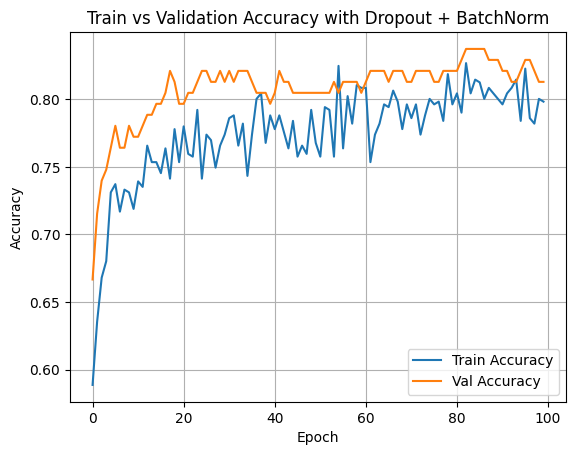

In [ ]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy with Dropout + BatchNorm')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#optimizer='sgd'
#optimizer='rmsprop'
#optimizer='adam'

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7298 - loss: 0.5114 

Test Accuracy: 0.7338
Test Loss: 0.4960


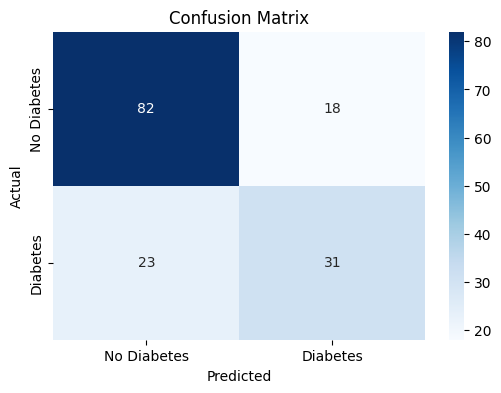


📋 Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.78      0.82      0.80       100
    Diabetes       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

# Predict probabilities for test set
y_probs = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = (y_probs > 0.5).astype("int32")

# Evaluate accuracy and loss
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ==========================
# CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==========================
# CLASSIFICATION REPORT
# ==========================
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("\n📋 Classification Report:\n")
print(report)


# Multi-Class Classification using MNIST (Handwritten Digits)

Loading MNIST dataset...
MNIST data loaded successfully.

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)

Pixel value range BEFORE normalization: min=0, max=255
 Pixel value range AFTER normalization: min=0.00, max=1.00

Sample labels BEFORE one-hot encoding: [5 0 4 1 9]
Sample labels AFTER one-hot encoding:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 

Displaying sample images from training set...


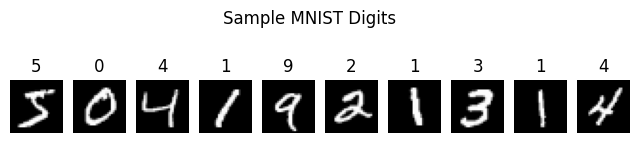

Visualization complete.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset from Keras
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("MNIST data loaded successfully.\n")

# 🔍 Print shapes of data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}\n")

# BEFORE normalization: check pixel value range
print(f"Pixel value range BEFORE normalization: min={X_train.min()}, max={X_train.max()}")

# Normalize pixel values (scale to range [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# AFTER normalization: check pixel value range
print(f" Pixel value range AFTER normalization: min={X_train.min():.2f}, max={X_train.max():.2f}\n")

# BEFORE one-hot encoding: show first 5 labels
print("Sample labels BEFORE one-hot encoding:", y_train[:5])

# One-hot encode labels for multi-class classification
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# AFTER one-hot encoding: show first 5 encoded labels
print("Sample labels AFTER one-hot encoding:\n", y_train_cat[:5], "\n")

# Display some sample digits
print("Displaying sample images from training set...")
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
    plt.title(y_train[i])
plt.suptitle("Sample MNIST Digits")
plt.show()
print("Visualization complete.\n")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("Building a deep fully connected model with regularization...")

# Define the model
model = Sequential()

# Input layer - flatten image
model.add(Flatten(input_shape=(28, 28)))

# First dense block
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

# Second dense block
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

# Third dense block
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" Model compiled successfully.\n")

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=5,             # Stop after 5 epochs without improvement
    restore_best_weights=True
)

print("Training the model with EarlyStopping...")

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

print("\n Training finished. Evaluating model...")

Building a deep fully connected model with regularization...
 Model compiled successfully.

Training the model with EarlyStopping...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8984 - loss: 0.3352 - val_accuracy: 0.9715 - val_loss: 0.0952
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9789 - loss: 0.0697 - val_accuracy: 0.9742 - val_loss: 0.0824
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9792 - val_loss: 0.0787
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9876 - loss: 0.0359 - val_accuracy: 0.9773 - val_loss: 0.0761
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9783 - val_loss: 0.0736
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9798 - val_loss: 0.0744
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9923 - loss: 0.0218 - val_accuracy: 0.9775 - val_loss: 0.0805
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9938 - loss: 0.0185 - val_

 Test Accuracy of Deep Dense Model: 0.9770


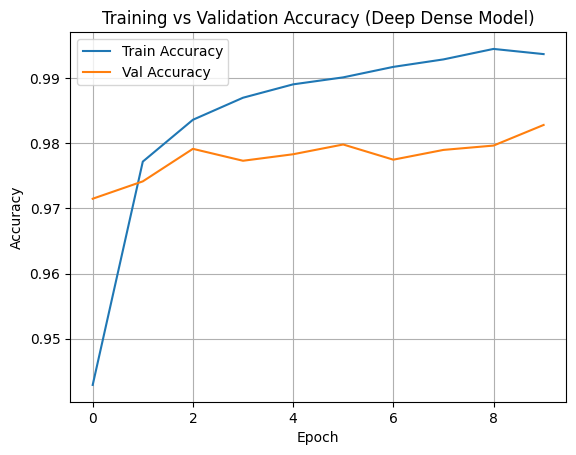

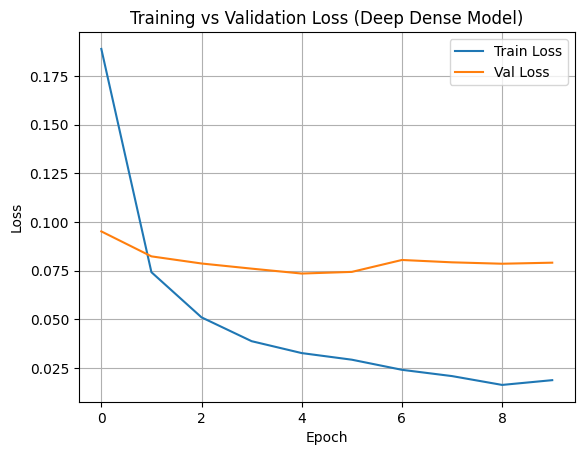

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f" Test Accuracy of Deep Dense Model: {test_acc:.4f}")

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy (Deep Dense Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#  Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (Deep Dense Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.9770
Test Loss: 0.0736


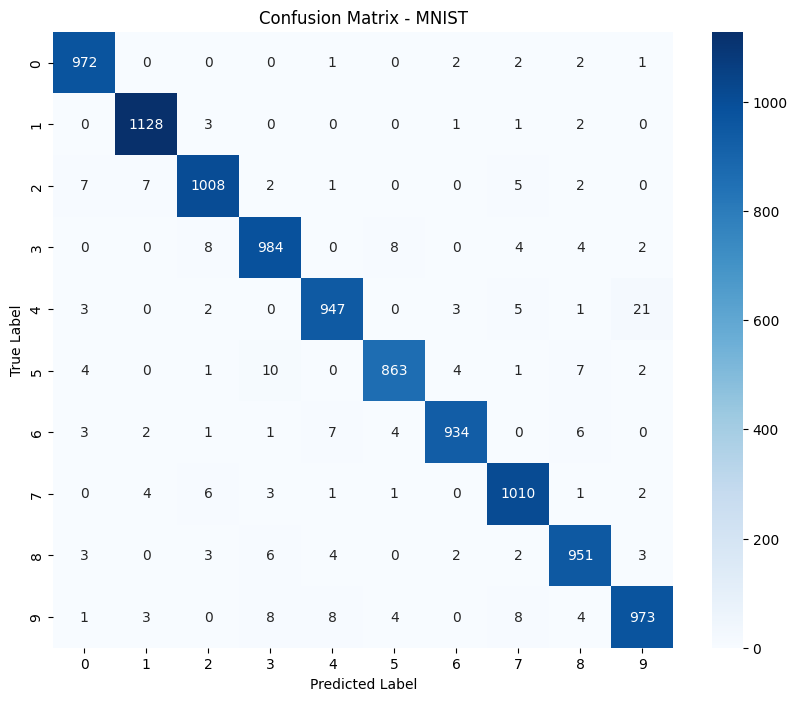

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Evaluate loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ==========================
# CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST")
plt.show()

# ==========================
# CLASSIFICATION REPORT
# ==========================
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))